# **Netflix Data: Cleaning, Analysis, and Visualization**

In [1]:
# Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Step 2: Load the Dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/netflix_data.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Step 3: Data Cleaning
#Identify and handle missing data, correct data types, and drop duplicates.

# Check for missing values
print(data.isnull().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Drop rows with missing critical information
data.dropna(subset=['director', 'country'],inplace=True)

# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Show data types to confirm changes
print(data.dtypes)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


**Step 4: Exploratory Data Analysis (EDA)**

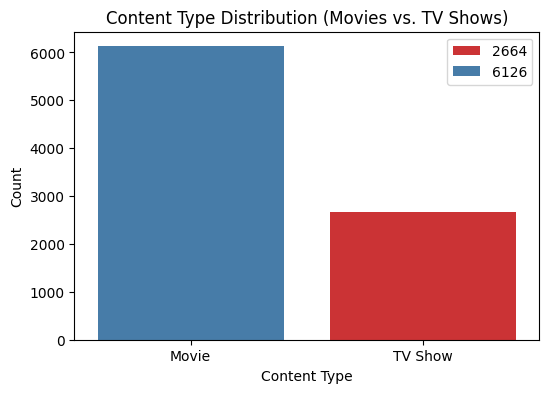

In [4]:
# 1. Content Type Distribution (Movies vs. TV Shows)

type_counts = data['type'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.values, palette='Set1')
plt.title('Content Type Distribution (Movies vs. TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

In [5]:
# 2. Most Common Genres

data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts()
genre_counts.head(10)
# print(all_genres)

,count
International Movies,2624
Dramas,1599
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
International TV Shows,773
Independent Movies,736
TV Dramas,695
Romantic Movies,613


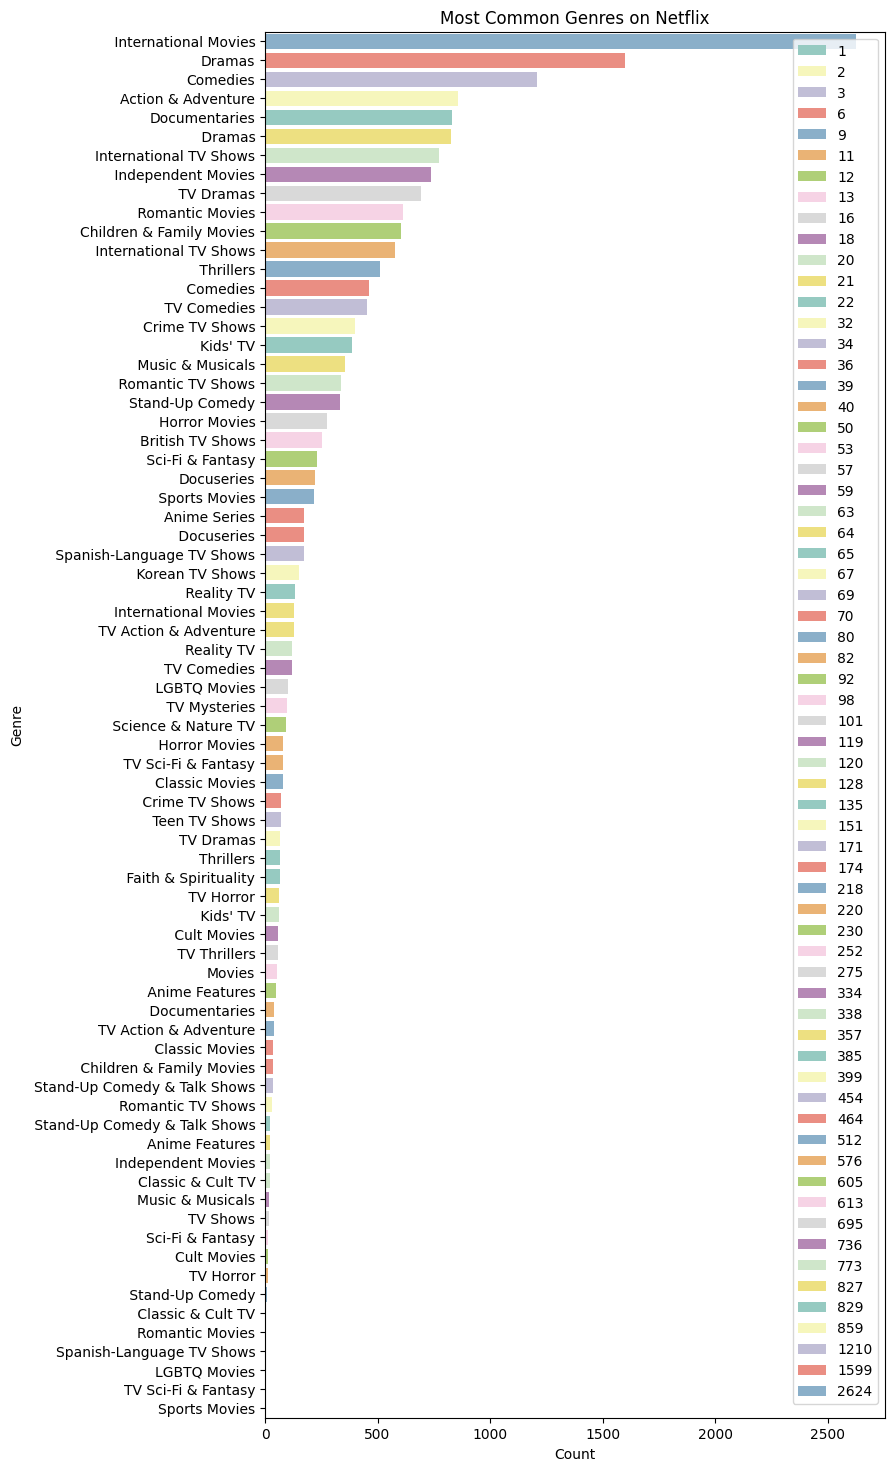

In [6]:
# Plot the most common genres

plt.figure(figsize=(8, 18))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.values, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

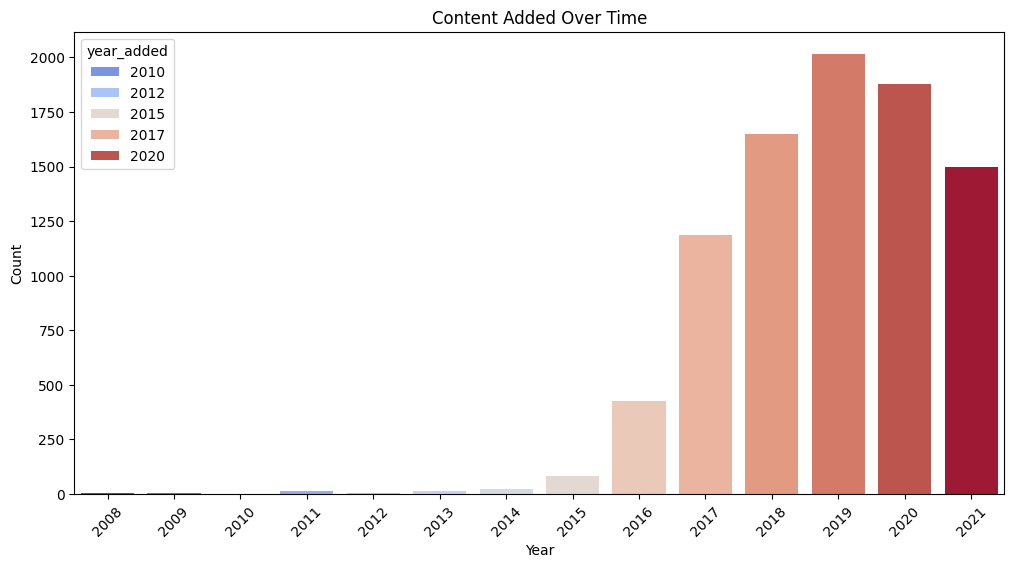

In [7]:
# 3. Content Added Over Time

# Extract year from 'date_added'
data['year_added'] = data['date_added'].dt.year

# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, hue='year_added', palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()